In [ ]:
import torch

## 3.1.1 텐서의 차원 자유자재로 다루기

In [3]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [4]:
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [5]:
x = torch.squeeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [6]:
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [7]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러출력

shape '[2, 4]' is invalid for input of size 9


## 3.1.2  텐서를 이용한 연산과 행렬곱

In [8]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
print("w size:",w.size())
print("x size:",x.size())
print("w:",w)
print("x:",x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-2.0490, -0.6096, -0.5557],
        [-1.2732,  0.5708, -1.8098],
        [ 0.3502, -0.6999,  1.3430],
        [ 1.7297, -0.3794, -0.7756],
        [-1.6721, -1.1553,  0.6792]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


w는 정규분포(normal distribution)에서 무작위로 값을 뽑아 텐서를 생성하는 randn() 함수에 5와 3을 인수로 전달하여 5x3의 shape를 가진 텐서를 만든다.

무작위로 값을 뽑을 때 실수의 범위 내에서 뽑도록 randn() 함수의 인수 dtype에 torch.float를 지정한다.

In [9]:
b = torch.randn(5, 2, dtype=torch.float)
print('b size:', b.size())
print("b:", b)

b size: torch.Size([5, 2])
b: tensor([[-1.4885,  2.0395],
        [-1.2022, -1.5805],
        [-0.0304,  0.9215],
        [-0.1375, -0.3068],
        [-0.1078,  1.1404]])


* 행렬곱은 torch.mm() 함수를 사용해 수행한다.

In [10]:
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[ -6.6566,  -9.8710],
        [ -8.6099, -11.1221],
        [  4.9653,   5.9586],
        [ -3.2864,  -2.7117],
        [ -1.7419,  -3.8900]])


In [11]:
result = wx + b
print("result size:", result.size())
print("result:", result)

result size: torch.Size([5, 2])
result: tensor([[ -8.1452,  -7.8316],
        [ -9.8121, -12.7026],
        [  4.9349,   6.8801],
        [ -3.4240,  -3.0185],
        [ -1.8497,  -2.7496]])


## 3.1.3 Autograd



In [12]:
w = torch.tensor(1.0, requires_grad = True)

requires_grad를 True 값으로 설정하면 파이토치의 Autograd 기능이 자동으로 계산할 때 w에 대한 미분값을 w.grad에 저장한다.

In [14]:
a = w*3

In [16]:
l = a**2

In [17]:
l.backward()
print('l을 w로 미분한 값은 {}'.format(w.grad))

l을 w로 미분한 값은 18.0


backward() 메서드는 연쇄법칙을 통한 미분을 지원한다.

# 3.2 경사하강법으로 이미지 복원하기

## 3.2.1 오염된 이미지 문제

이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100x100 픽셀의 오염된 이미지가 만들어졌습니다.

이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황입니다.

다행히도 weird_function() 함수의 소스코드는 남아 있습니다.

오염된 이미지와 weird_function() 함수를 활용해서 원본 이미지를 복원해보자.

## 3.2.2 오염된 이미지를 복원하는 방법

해결 과정은 다음과 같다.

1. 오염된 이미지(broken_image)와 크기가 같은 랜덤 텐서(random_tensor)를 생성한다.<br> 
   (랜덤 텐서는 오염된 이미지와 크기가 같은 무작위 이미지 텐서를 의미한다)
   

2. 랜덤 텐서를 werid_function() 함수에 입력해 똑같이 오염된 이미지를 가설(hypothesis)이라고 부른다.
    - 원본 이미지가 weird_function() 함수에 입력되어 오염된 이미지를 출력했다.
    - 인위적으로 생성한 무작위 이미지가 weird_function() 함수에 입력되어 가설을 출력했다.


3. 가설과 오염된 이미지가 같다면, 무작위 이미지와 원본 이미지도 같을 것이다.


4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.

In [18]:
import torch
import pickle
import matplotlib.pyplot as plt

In [19]:
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

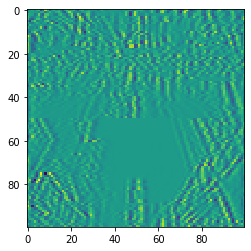

In [20]:
plt.imshow(broken_image.view(100,100))

In [22]:
#이미지를 오염시키는 함수
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [23]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

torch.dist()는 두 텐서 사이의 거리를 구하는 함수이다. 이번 예시에서 오찻값은 이처럼 단순한 거리로 설정한다.

In [24]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [25]:
lr = 0.8
for i in range(0,20000):
    # 오차 함수를 random_tensor로 미분해야 하니 requires_grad를 True로 설정한다.
    random_tensor.requires_grad_(True)
    
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    with torch.no_grad(): #경사하강법을 직접구현하기 때문에 자동 기울기 계산을 비활성화 한다.
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.336073875427246
Loss at 1000 = 1.1235688924789429
Loss at 2000 = 0.5413160920143127
Loss at 3000 = 0.3825981616973877
Loss at 4000 = 0.3052511513233185
Loss at 5000 = 0.2564932703971863
Loss at 6000 = 0.22134746611118317
Loss at 7000 = 0.19358384609222412
Loss at 8000 = 0.17017407715320587
Loss at 9000 = 0.14951613545417786
Loss at 10000 = 0.13069765269756317
Loss at 11000 = 0.11316361278295517
Loss at 12000 = 0.09655767679214478
Loss at 13000 = 0.08064078539609909
Loss at 14000 = 0.06524831801652908
Loss at 15000 = 0.050264593213796616
Loss at 16000 = 0.03560958430171013
Loss at 17000 = 0.02123083919286728
Loss at 18000 = 0.021163059398531914
Loss at 19000 = 0.021166693419218063


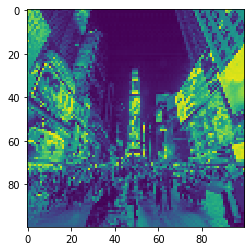

In [26]:
plt.imshow(random_tensor.view(100,100).data)

# 3.3 신경망 모델 구현하기

## 3.3.1 인공 신경망(ANN)

In [27]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [28]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [29]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

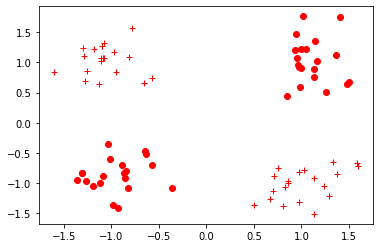

In [30]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [31]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [32]:
class NeuralNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(NeuralNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
            
        def forward(self, input_tensor):
            linear1 = self.linear_1(input_tensor)
            relu = self.relu(linear1)
            linear2 = self.linear_2(relu)
            output = self.sigmoid(linear2)
            return output

super() 함수를 부르면 생선한 NeuralNet 클래스가 nn.Module 클래스의 속성들로 다시 초기화 된다.

이 경우 super().\_\_init\_\_은 nn.Module의 \_\_init\_\_의 초기값을 다시 불러오게 된다.

In [33]:
model = NeuralNet(2, 5) # input_size = 2, hidden_size = 5
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epochs(이폭)은 전체 학습 데이터를 총 몇 번 모델에 입력할지 결정하는 변수이다.

In [34]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6830099821090698


In [35]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step() #가중치를 갱신한다

Train loss at 0 is 0.7069257497787476
Train loss at 100 is 0.6443682909011841
Train loss at 200 is 0.569150447845459
Train loss at 300 is 0.48847001791000366
Train loss at 400 is 0.42268672585487366
Train loss at 500 is 0.36489322781562805
Train loss at 600 is 0.3077560067176819
Train loss at 700 is 0.2570995092391968
Train loss at 800 is 0.21667499840259552
Train loss at 900 is 0.18446432054042816
Train loss at 1000 is 0.15840056538581848
Train loss at 1100 is 0.1375458538532257
Train loss at 1200 is 0.12084649503231049
Train loss at 1300 is 0.1071142926812172
Train loss at 1400 is 0.09574198722839355
Train loss at 1500 is 0.0862225815653801
Train loss at 1600 is 0.07818524539470673
Train loss at 1700 is 0.07133715599775314
Train loss at 1800 is 0.06546084582805634
Train loss at 1900 is 0.0603749081492424


In [36]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.06096944212913513


In [37]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.0423, -1.2568],
        [-1.1153, -1.9960],
        [ 1.7493,  1.1484],
        [ 0.8082,  0.6983],
        [ 1.0606, -1.1571]])), ('linear_1.bias', tensor([-0.2832,  0.0294, -0.1285, -0.3353, -0.3710])), ('linear_2.weight', tensor([[ 1.5709, -2.1878, -1.9056, -0.7585,  1.2858]])), ('linear_2.bias', tensor([1.9110]))])


학습된 모델을 state_dict() 함수 형태로 바꾸어 준 후 .pt 파일로 저장하면 <br>
모델 내 가중치들이 딕셔너리 형태로 {연산이름: 가중치 텐서와 편향 텐서}와 같이 표현된 데이터가 저장된다.


파일을 생성하면 언제든 이 파일을 읽어들여 새로운 신경망 객체에 이미 학습된 모델의 가중치를 곧바로 적용할 수 있다.

In [38]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.8711298108100891
